In [1]:
import dask
import dask.threaded
import dask.multiprocessing
from dask.distributed import Client

c = Client()


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/distributed/dashboard/core.py:74: UserWarning: 
Failed to start diagnostics server on port 8787. [Errno 13] Permission denied
  warnings.warn("\n" + msg)


In [2]:
c

Client Scheduler: tcp://127.0.0.1:39819 Dashboard: http://127.0.0.1:44848/status,Cluster Workers: 8 Cores: 48 Memory: 134.91 GB


In [3]:
import xarray as xr 
import dask 
import numpy as np 
import os 
import time 
import glob
from datetime import date
import numpy.ma as ma
import matplotlib.pyplot as plt


today=date.today()

import seaborn as sns
sns.set(color_codes=True)

#https://pmall.univ-grenoble-alpes.fr/docs/auto_examples_code/windrose/windrose-exemple.html

In [4]:
Date_sept=['20120901','20120902','20120903','20120904','20120905','20120906','20120907','20120908','20120909','20120910','20120911','20120912','20120913','20120914','20120915','20120916','20120917','20120918','20120919','20120920','20120921','20120922','20120923','20120924','20120925','20120926','20120927','20120928','20120929','20120930']
Date_march=['20130301','20130302','20130303','20130304','20130305','20130306','20130307','20130308','20130309','20130310','20130311','20130312','20130313','20130314','20130315','20130316','20130317','20130318','20130319','20130320','20130321','20130322','20130323','20130324','20130325','20130326','20130327','20130328','20130329','20130330']
Date_month={'march':Date_march,'sept':Date_sept}

In [5]:
def get_angle(box,month):
    print('get mag and angle for box '+str(box)+' and month '+str(month))
    Date=Date_month[month]
    datasets_tu = []
    for date in Date:
        ztu_file='/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/1d/turner-angle/NATL60-CJM165_Tu_complex_'+str(date)+'.1d_'+str(box)+'.nc'
        zdstu=xr.open_dataset(ztu_file)
        datasets_tu.append(zdstu)
    all_tu=xr.concat(datasets_tu,dim='z')
    Tu=all_tu['Tu']
    return Tu
   
    
    

In [6]:
Tu_sept_AC=get_angle('AC','sept')
Tu_march_AC=get_angle('AC','march')
Tu_sept_GS=get_angle('GS','sept')
Tu_march_GS=get_angle('GS','march')
Tu_sept_NE=get_angle('NE','sept')
Tu_march_NE=get_angle('NE','march')


get mag and angle for box AC and month sept
get mag and angle for box AC and month march
get mag and angle for box GS and month sept
get mag and angle for box GS and month march
get mag and angle for box NE and month sept
get mag and angle for box NE and month march


In [7]:
print(np.min(Tu_sept_AC.values))

-1.5707947020580872


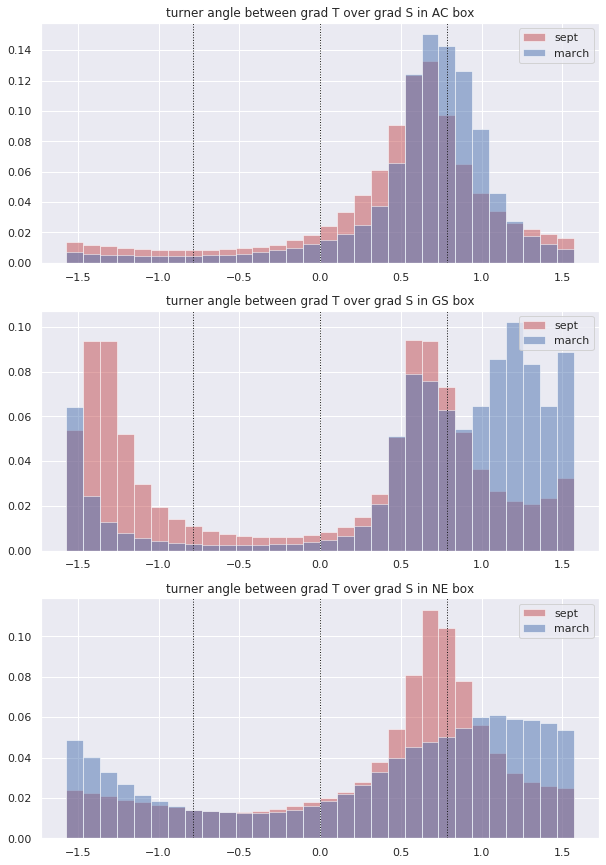

In [8]:
fig = plt.figure(figsize=(10.0, 15.0))


axes2 = fig.add_subplot(3, 1, 1)
weights = np.ones_like(Tu_sept_AC)/float(len(Tu_sept_AC))
axes2.hist(Tu_sept_AC,30, alpha = 0.5,range=(-1*np.pi/2,np.pi/2),color='r', weights=weights, label='sept')
weights = np.ones_like(Tu_march_AC)/float(len(Tu_march_AC))
axes2.hist(Tu_march_AC,30, alpha = 0.5,range=(-1*np.pi/2,np.pi/2),color='b', weights=weights, label='march')
axes2.axvline(-1*np.pi/4, color='k', linestyle='dotted', linewidth=1)
axes2.axvline(0, color='k', linestyle='dotted', linewidth=1)
axes2.axvline(np.pi/4, color='k', linestyle='dotted', linewidth=1)

plt.legend()
plt.title('turner angle between grad T over grad S in AC box')


axes4 = fig.add_subplot(3, 1, 2)
weights = np.ones_like(Tu_sept_GS)/float(len(Tu_sept_GS))
axes4.hist(Tu_sept_GS,30, alpha = 0.5,range=(-1*np.pi/2,np.pi/2),color='r', weights=weights, label='sept')
weights = np.ones_like(Tu_march_GS)/float(len(Tu_march_GS))
axes4.hist(Tu_march_GS,30, alpha = 0.5,range=(-1*np.pi/2,np.pi/2),color='b', weights=weights, label='march')
axes4.axvline(-1*np.pi/4, color='k', linestyle='dotted', linewidth=1)
axes4.axvline(0, color='k', linestyle='dotted', linewidth=1)
axes4.axvline(np.pi/4, color='k', linestyle='dotted', linewidth=1)

plt.legend()
plt.title('turner angle between grad T over grad S in GS box')


axes6 = fig.add_subplot(3, 1, 3)
weights = np.ones_like(Tu_sept_NE)/float(len(Tu_sept_NE))
axes6.hist(Tu_sept_NE,30, alpha = 0.5,range=(-1*np.pi/2,np.pi/2),color='r', weights=weights, label='sept')
weights = np.ones_like(Tu_march_NE)/float(len(Tu_march_NE))
axes6.hist(Tu_march_NE,30, alpha = 0.5,range=(-1*np.pi/2,np.pi/2),color='b', weights=weights, label='march')
axes6.axvline(-1*np.pi/4, color='k', linestyle='dotted', linewidth=1)
axes6.axvline(0, color='k', linestyle='dotted', linewidth=1)
axes6.axvline(np.pi/4, color='k', linestyle='dotted', linewidth=1)

plt.legend()
plt.title('turner angle between grad T over grad S in NE box')

plt.savefig('hist_complex_turner_angle_all_boxes.png')